In [ ]:
print("h")

In [ ]:
import tensorflow as tf
import numpy as np
import time
import random
import math

# Check if GPU is available and if so, set the device
if tf.config.experimental.list_physical_devices("GPU"):
    print("GPU available. Using GPU for calculations.")
    device = '/GPU:0'
else:
    print("GPU not available. Using CPU for calculations.")
    device = '/CPU:0'

In [ ]:
import tensorflow as tf
import numpy as np
import time

def generate_theta_1(size):  #reference measure theta(1) which is theta1 * theta2
  points=np.zeros([size,2])
  points[:,0]=np.random.random_sample(size)  #theta1
  points[:,1]=2*(np.random.random_sample(size)**2) #theta2

  return points

def generate_theta_2(size):  #reference measure theta(2) which is 0.5*theta(2) + 0.5* same

   points = np.zeros([size, 2])
   points[:, 0] = np.random.random_sample(size) #theta1 part- in both cases the same
   points[:round(size/2), 1] = 2 * ((np.random.random_sample(round(size/2))) ** 2) #theta2 part where it's just mapping the same for half of it
   points[round(size/2):, 1] = 2 * (points[round(size/2):, 0] ** 2) #theta2 part where it's taking the theta1 part for half of it and enforcing theta2 on it

   return points

def create_model(m=64):  #Creating the uni-varaite functions h_1 and h_2 as DNN models
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(m, input_shape=(1,), activation='relu',
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                              bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
        tf.keras.layers.Dense(m, activation='relu',
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                              bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
        tf.keras.layers.Dense(m, activation='relu',
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                              bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
        tf.keras.layers.Dense(1,
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1))
    ])
    return model

def create_models(m=64):
    h1 = create_model(m)
    h2 = create_model(m)
    return h1, h2

# Define the function h
def h(data,h1,h2):
  x_1=data[:,0:1]
  x_2=data[:,1:2]
  h_1= h1(x_1)
  h_2= h2(x_2)
  return h_1 + h_2

def integral_h(data,h1,h2):
  return tf.reduce_mean(h(data,h1,h2))

def portfolio_return(x1,x2, w):  # w is the weight for the second portfolio
  return (1-w)*x1 + w*x2


def variance(input):
  mean=tf.reduce_mean(input)
  return (input-mean)**2

def f(portfolio_return,landa):
  return portfolio_return-landa*variance(portfolio_return)


def no_short_selling_penalty(w):
  return 100 * tf.nn.relu(-w) + 100 * tf.nn.relu((w-1))

def integral_beta(gamma,landa,data,w,h1,h2):
  output= tf.reduce_mean( (1/gamma)* tf.square(gamma*tf.nn.relu(((-f(portfolio_return(data[:,0:1],data[:,1:2],w),landa)-h(data,h1,h2))))))
  return output

def target_function(data,size,gamma,landa,w,h1,h2,no_short_selling=True):

  temp= integral_h(data,h1,h2) + integral_beta(gamma,landa,data,w,h1,h2)
  if no_short_selling:
    temp+=no_short_selling_penalty(w)
  return temp

def analytical_portfolio(landa):
  if landa==0:
    return 1
  if landa==1:
    return 0

  temp = 15*(1-landa)/(19*landa)

  if temp>1:
    temp=math.floor(temp)

  return temp

def analytical_optimal_value(landa):
  w=analytical_portfolio(landa)
  return (0.5+ w/6 -landa*(1/12 + w/6 + (19*w**2)/180))

In [ ]:
gamma=160
landa=0.8
size=2**12
learning_rate=0.001
beta1=0.99
beta2=0.995
epochs=10000
tol_h = 1e-5
num_experiments=15
m=32

Starting experiment 1
Epoch: 0 Loss for h1 and h2 and w: 483.37082
Epoch: 1000 Loss for h1 and h2 and w: -0.35894167
Epoch: 2000 Loss for h1 and h2 and w: -0.443291
Epoch: 3000 Loss for h1 and h2 and w: -0.44557002
Epoch: 4000 Loss for h1 and h2 and w: -0.44549823
Epoch: 5000 Loss for h1 and h2 and w: -0.44562608
Epoch: 6000 Loss for h1 and h2 and w: -0.44546983
Epoch: 7000 Loss for h1 and h2 and w: -0.44529104
Epoch: 8000 Loss for h1 and h2 and w: -0.44546273
Epoch: 9000 Loss for h1 and h2 and w: -0.4455218
Optimal w for experiment 1 : 0.21780528


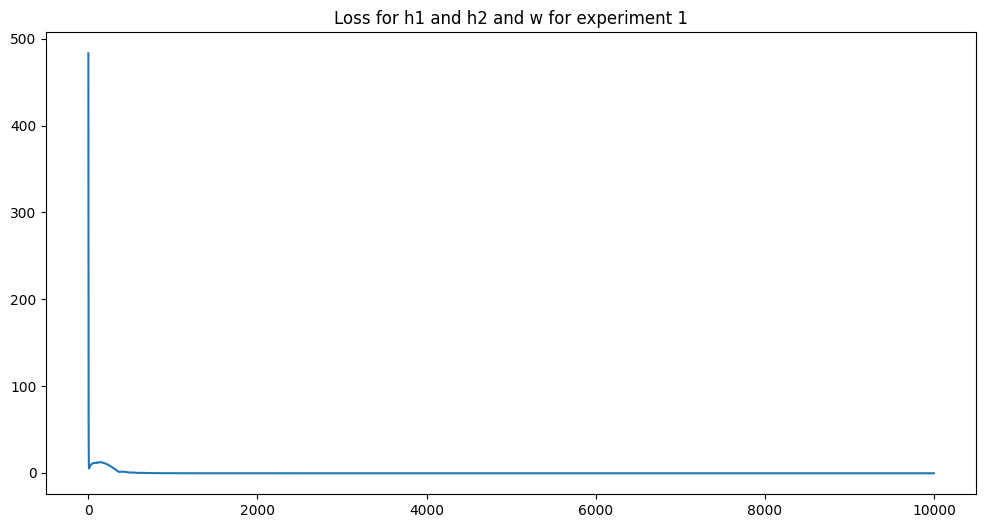

Starting experiment 2
Epoch: 0 Loss for h1 and h2 and w: 22.400047
Epoch: 1000 Loss for h1 and h2 and w: -0.44188982
Epoch: 2000 Loss for h1 and h2 and w: -0.44699645
Epoch: 3000 Loss for h1 and h2 and w: -0.4474156
Epoch: 4000 Loss for h1 and h2 and w: -0.4474811
Epoch: 5000 Loss for h1 and h2 and w: -0.44710672
Epoch: 6000 Loss for h1 and h2 and w: -0.44759762
Epoch: 7000 Loss for h1 and h2 and w: -0.44706568
Epoch: 8000 Loss for h1 and h2 and w: -0.447308
Epoch: 9000 Loss for h1 and h2 and w: -0.4471357
Optimal w for experiment 2 : 0.211396


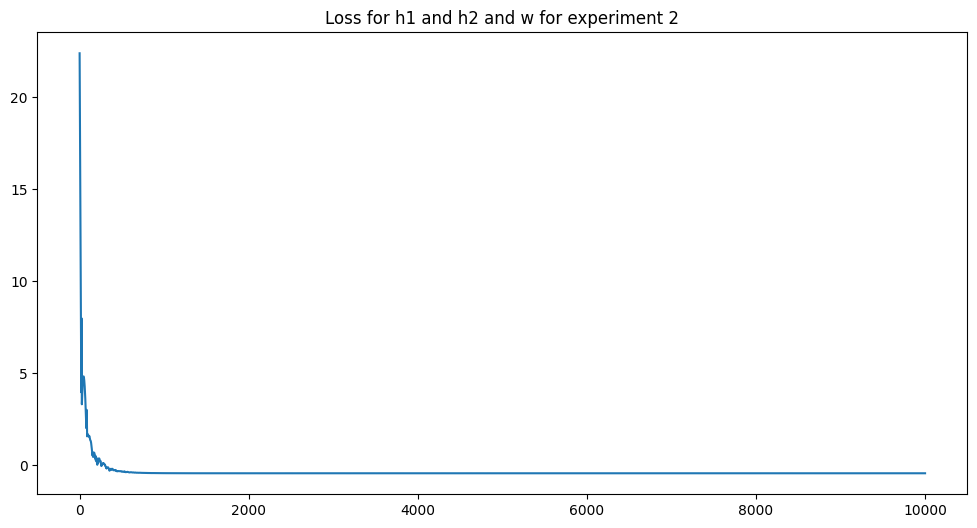

Starting experiment 3
Epoch: 0 Loss for h1 and h2 and w: 22.526709
Epoch: 1000 Loss for h1 and h2 and w: -0.43891
Epoch: 2000 Loss for h1 and h2 and w: -0.44620994
Epoch: 3000 Loss for h1 and h2 and w: -0.44612077
Epoch: 4000 Loss for h1 and h2 and w: -0.44602287
Epoch: 5000 Loss for h1 and h2 and w: -0.4461378
Epoch: 6000 Loss for h1 and h2 and w: -0.4461335
Epoch: 7000 Loss for h1 and h2 and w: -0.44633245


In [ ]:
import matplotlib.pyplot as plt
import math as math
with tf.device(device):
  # Prepare a list to store the final w values
  final_w_values = []


  # Start the experiments
  for i in range(num_experiments):
      print("Starting experiment", i + 1)

      # Reset the models and w for each experiment
      h1, h2 = create_models(m)
      w = tf.Variable(0.5)

      # Define the optimizers
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta1, beta_2=beta2)
      # Generate new data for each experiment
      data = generate_theta_1(size)

      # Prepare lists to store the loss values for plotting
      loss_values_h = []
      recorded_loss=100000000

      # Training loop for h1 and h2
      for epoch in range(epochs):
          Flag=False
          with tf.GradientTape() as tape:
              loss = target_function(data, size, gamma, landa, w, h1, h2)

          grads = tape.gradient(loss, h1.trainable_variables + h2.trainable_variables + [w])
          optimizer.apply_gradients(zip(grads, h1.trainable_variables + h2.trainable_variables + [w]))
          # Store the loss value for plotting
          loss_values_h.append(loss.numpy())

          # Print the loss value every 10 epochs
          if epoch % 1000 == 0:
              print('Epoch:', epoch, 'Loss for h1 and h2 and w:', loss.numpy())
              if abs(recorded_loss-loss)<tol_h:
                Flag=True
              recorded_loss=loss.numpy()





          prev_w = w.numpy()

      # Record the optimal w value for this experiment
      if not Flag:
        final_w_values.append(w.numpy())
        print("Optimal w for experiment", i + 1, ":", w.numpy())
      else:
        print("This is a case a vanishing gradients")
        break
      # Plot the loss values
      plt.figure(figsize=(12, 6))
      plt.plot(loss_values_h)
      plt.title('Loss for h1 and h2 and w for experiment ' + str(i+1))
      plt.show()
  # Compute and print the mean of the optimal w values
  mean_w = np.mean(final_w_values)
  print("Mean of optimal w values:", mean_w)


In [ ]:
# Plot the mean of optimal w values for different values of m
plt.figure(figsize=(10, 6))
plt.plot(m_values, mean_w_values, 'o-')
plt.xlabel('m')
plt.ylabel('Mean of optimal w values')
plt.title('Mean of optimal w values for different values of m')
plt.grid(True)
plt.show()

# Plot the mean of optimal w values for different values of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, mean_w_values, 'o-')
plt.xlabel('gamma')
plt.ylabel('Mean of optimal w values')
plt.title('Mean of optimal w values for different values of gamma')
plt.grid(True)
plt.show()

# Plot the mean of optimal w values for different values of m and gamma
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(m_values, gamma_values, mean_w_values)
ax.set_xlabel('m')
ax.set_ylabel('gamma')
ax.set_zlabel('Mean of optimal w values')
plt.title('Mean of optimal w values for different values of m and gamma')
plt.show()